In [1]:
# importing the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv("household_power_consumption.txt",sep=';')
data

C:\Users\bhattade\AppData\Local\Temp\ipykernel_13856\3715934069.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("household_power_consumption.txt",sep=';')


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [4]:
data_sample = data.sample(50000) # the original data has 20 lakhs records. let's work on 50000 records for this task.

In [5]:
data_sample

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
215916,15/5/2007,16:00:00,0.280,0.000,236.930,1.200,0.000,0.000,0.0
502432,30/11/2007,15:16:00,2.816,0.144,245.860,11.600,0.000,24.000,18.0
154176,2/4/2007,19:00:00,1.452,0.078,239.570,6.000,0.000,0.000,18.0
362761,25/8/2007,15:25:00,1.388,0.240,238.120,5.800,1.000,1.000,17.0
1280344,23/5/2009,20:28:00,1.450,0.118,237.690,6.000,0.000,0.000,19.0
...,...,...,...,...,...,...,...,...,...
383717,9/9/2007,04:41:00,0.178,0.056,240.870,0.800,0.000,0.000,0.0
567640,14/1/2008,22:04:00,3.492,0.246,234.800,14.800,43.000,0.000,0.0
113113,5/3/2007,06:37:00,1.798,0.082,241.250,7.400,0.000,0.000,17.0
773538,5/6/2008,21:42:00,0.634,0.194,238.300,2.800,2.000,0.000,1.0


In [6]:
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 215916 to 1904609
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   50000 non-null  object 
 1   Time                   50000 non-null  object 
 2   Global_active_power    50000 non-null  object 
 3   Global_reactive_power  50000 non-null  object 
 4   Voltage                50000 non-null  object 
 5   Global_intensity       50000 non-null  object 
 6   Sub_metering_1         50000 non-null  object 
 7   Sub_metering_2         50000 non-null  object 
 8   Sub_metering_3         49312 non-null  float64
dtypes: float64(1), object(8)
memory usage: 3.8+ MB


In [7]:
data_sample.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [8]:
data_sample.isnull().sum()

Date                       0
Time                       0
Global_active_power        0
Global_reactive_power      0
Voltage                    0
Global_intensity           0
Sub_metering_1             0
Sub_metering_2             0
Sub_metering_3           688
dtype: int64

We have 630 null values in Sub_metering_3 feature

In [9]:
# Let's handle the data types

In [10]:
data_sample.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
215916,15/5/2007,16:00:00,0.280,0.000,236.930,1.200,0.000,0.000,0.0
502432,30/11/2007,15:16:00,2.816,0.144,245.860,11.600,0.000,24.000,18.0
154176,2/4/2007,19:00:00,1.452,0.078,239.570,6.000,0.000,0.000,18.0
362761,25/8/2007,15:25:00,1.388,0.240,238.120,5.800,1.000,1.000,17.0
1280344,23/5/2009,20:28:00,1.450,0.118,237.690,6.000,0.000,0.000,19.0


In [11]:
data_sample["Date_formatted"] = pd.to_datetime(data_sample['Date'])

C:\Users\bhattade\AppData\Local\Temp\ipykernel_13856\2510954065.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data_sample["Date_formatted"] = pd.to_datetime(data_sample['Date'])


In [12]:
data_sample.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Date_formatted
215916,15/5/2007,16:00:00,0.280,0.000,236.930,1.200,0.000,0.000,0.0,2007-05-15
502432,30/11/2007,15:16:00,2.816,0.144,245.860,11.600,0.000,24.000,18.0,2007-11-30
154176,2/4/2007,19:00:00,1.452,0.078,239.570,6.000,0.000,0.000,18.0,2007-02-04
362761,25/8/2007,15:25:00,1.388,0.240,238.120,5.800,1.000,1.000,17.0,2007-08-25
1280344,23/5/2009,20:28:00,1.450,0.118,237.690,6.000,0.000,0.000,19.0,2009-05-23


In [13]:
# Let's drop the date column now
data_sample.drop("Date",axis=1,inplace=True)

In [14]:
data_sample.rename(columns={"Date_formatted":"Date"},inplace=True)

In [15]:
data_sample

,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Date
215916,16:00:00,0.280,0.000,236.930,1.200,0.000,0.000,0.0,2007-05-15
502432,15:16:00,2.816,0.144,245.860,11.600,0.000,24.000,18.0,2007-11-30
154176,19:00:00,1.452,0.078,239.570,6.000,0.000,0.000,18.0,2007-02-04
362761,15:25:00,1.388,0.240,238.120,5.800,1.000,1.000,17.0,2007-08-25
1280344,20:28:00,1.450,0.118,237.690,6.000,0.000,0.000,19.0,2009-05-23
...,...,...,...,...,...,...,...,...,...
383717,04:41:00,0.178,0.056,240.870,0.800,0.000,0.000,0.0,2007-09-09
567640,22:04:00,3.492,0.246,234.800,14.800,43.000,0.000,0.0,2008-01-14
113113,06:37:00,1.798,0.082,241.250,7.400,0.000,0.000,17.0,2007-05-03
773538,21:42:00,0.634,0.194,238.300,2.800,2.000,0.000,1.0,2008-05-06


In [16]:
data_sample['Time'] = pd.to_datetime(data_sample['Time'])

In [17]:
data_sample['Hours'] = data_sample['Time'].dt.hour

In [18]:
data_sample['Minutes'] = data_sample['Time'].dt.minute

In [19]:
data_sample['Seconds'] = data_sample['Time'].dt.second

In [20]:
data_sample.head()

,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Date,Hours,Minutes,Seconds
215916,2023-07-17 16:00:00,0.280,0.000,236.930,1.200,0.000,0.000,0.0,2007-05-15,16,0,0
502432,2023-07-17 15:16:00,2.816,0.144,245.860,11.600,0.000,24.000,18.0,2007-11-30,15,16,0
154176,2023-07-17 19:00:00,1.452,0.078,239.570,6.000,0.000,0.000,18.0,2007-02-04,19,0,0
362761,2023-07-17 15:25:00,1.388,0.240,238.120,5.800,1.000,1.000,17.0,2007-08-25,15,25,0
1280344,2023-07-17 20:28:00,1.450,0.118,237.690,6.000,0.000,0.000,19.0,2009-05-23,20,28,0


In [21]:
# We can drop the Time column now
data_sample.drop('Time',axis=1,inplace=True)

In [22]:
data_sample['Day'] = data_sample['Date'].dt.day

In [23]:
data_sample['Month'] = data_sample['Date'].dt.month
data_sample['Year'] = data_sample['Date'].dt.year

In [24]:
data_sample.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Date,Hours,Minutes,Seconds,Day,Month,Year
215916,0.280,0.000,236.930,1.200,0.000,0.000,0.0,2007-05-15,16,0,0,15,5,2007
502432,2.816,0.144,245.860,11.600,0.000,24.000,18.0,2007-11-30,15,16,0,30,11,2007
154176,1.452,0.078,239.570,6.000,0.000,0.000,18.0,2007-02-04,19,0,0,4,2,2007
362761,1.388,0.240,238.120,5.800,1.000,1.000,17.0,2007-08-25,15,25,0,25,8,2007
1280344,1.450,0.118,237.690,6.000,0.000,0.000,19.0,2009-05-23,20,28,0,23,5,2009


In [25]:
data_sample.drop("Date",axis=1,inplace=True)

In [26]:
data_sample.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Hours,Minutes,Seconds,Day,Month,Year
215916,0.280,0.000,236.930,1.200,0.000,0.000,0.0,16,0,0,15,5,2007
502432,2.816,0.144,245.860,11.600,0.000,24.000,18.0,15,16,0,30,11,2007
154176,1.452,0.078,239.570,6.000,0.000,0.000,18.0,19,0,0,4,2,2007
362761,1.388,0.240,238.120,5.800,1.000,1.000,17.0,15,25,0,25,8,2007
1280344,1.450,0.118,237.690,6.000,0.000,0.000,19.0,20,28,0,23,5,2009


In [27]:
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 215916 to 1904609
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    50000 non-null  object 
 1   Global_reactive_power  50000 non-null  object 
 2   Voltage                50000 non-null  object 
 3   Global_intensity       50000 non-null  object 
 4   Sub_metering_1         50000 non-null  object 
 5   Sub_metering_2         50000 non-null  object 
 6   Sub_metering_3         49312 non-null  float64
 7   Hours                  50000 non-null  int64  
 8   Minutes                50000 non-null  int64  
 9   Seconds                50000 non-null  int64  
 10  Day                    50000 non-null  int64  
 11  Month                  50000 non-null  int64  
 12  Year                   50000 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 5.3+ MB


In [28]:
data_sample[data_sample['Global_active_power'].str.find("?")!=-1]

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Hours,Minutes,Seconds,Day,Month,Year
2032048,0.334,0.07,241.94,1.4,0.0,1.0,1.0,20,52,0,27,10,2010
2031624,0.52,0.088,245.75,2.2,0.0,0.0,1.0,13,48,0,27,10,2010
1713491,?,?,?,?,?,?,NaN,15,35,0,20,3,2010
1310936,?,?,?,?,?,?,NaN,2,20,0,14,6,2009
191805,?,?,?,?,?,?,NaN,22,9,0,28,4,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2045567,0.268,0.0,241.24,1.2,0.0,0.0,0.0,6,11,0,11,6,2010
2057898,1.018,0.204,236.4,4.4,0.0,0.0,0.0,19,42,0,14,11,2010
2071999,3.788,0.17,237.7,15.8,38.0,0.0,17.0,14,43,0,24,11,2010
2035983,1.608,0.168,244.43,6.6,0.0,1.0,19.0,14,27,0,30,10,2010


In [29]:
data_sample[data_sample['Global_active_power']!='?']

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Hours,Minutes,Seconds,Day,Month,Year
215916,0.280,0.000,236.930,1.200,0.000,0.000,0.0,16,0,0,15,5,2007
502432,2.816,0.144,245.860,11.600,0.000,24.000,18.0,15,16,0,30,11,2007
154176,1.452,0.078,239.570,6.000,0.000,0.000,18.0,19,0,0,4,2,2007
362761,1.388,0.240,238.120,5.800,1.000,1.000,17.0,15,25,0,25,8,2007
1280344,1.450,0.118,237.690,6.000,0.000,0.000,19.0,20,28,0,23,5,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383717,0.178,0.056,240.870,0.800,0.000,0.000,0.0,4,41,0,9,9,2007
567640,3.492,0.246,234.800,14.800,43.000,0.000,0.0,22,4,0,14,1,2008
113113,1.798,0.082,241.250,7.400,0.000,0.000,17.0,6,37,0,3,5,2007
773538,0.634,0.194,238.300,2.800,2.000,0.000,1.0,21,42,0,6,5,2008


In [30]:
data_sample[data_sample['Global_active_power'] == '?']

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Hours,Minutes,Seconds,Day,Month,Year
1713491,?,?,?,?,?,?,NaN,15,35,0,20,3,2010
1310936,?,?,?,?,?,?,NaN,2,20,0,14,6,2009
191805,?,?,?,?,?,?,NaN,22,9,0,28,4,2007
1988288,?,?,?,?,?,?,NaN,11,32,0,27,9,2010
1936699,?,?,?,?,?,?,NaN,15,43,0,22,8,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
193104,?,?,?,?,?,?,NaN,19,48,0,29,4,2007
194033,?,?,?,?,?,?,NaN,11,17,0,30,4,2007
1618181,?,?,?,?,?,?,NaN,11,5,0,13,1,2010
193087,?,?,?,?,?,?,NaN,19,31,0,29,4,2007


In [31]:
data_sample = data_sample.drop(data_sample[data_sample['Global_active_power'] == '?'].index)

In [32]:
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49312 entries, 215916 to 1904609
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    49312 non-null  object 
 1   Global_reactive_power  49312 non-null  object 
 2   Voltage                49312 non-null  object 
 3   Global_intensity       49312 non-null  object 
 4   Sub_metering_1         49312 non-null  object 
 5   Sub_metering_2         49312 non-null  object 
 6   Sub_metering_3         49312 non-null  float64
 7   Hours                  49312 non-null  int64  
 8   Minutes                49312 non-null  int64  
 9   Seconds                49312 non-null  int64  
 10  Day                    49312 non-null  int64  
 11  Month                  49312 non-null  int64  
 12  Year                   49312 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 5.3+ MB


In [33]:
data_sample['Global_active_power'] = data_sample['Global_active_power'].astype(float)
data_sample['Global_reactive_power'] = data_sample['Global_reactive_power'].astype(float)
data_sample['Voltage'] = data_sample['Voltage'].astype(float)
data_sample['Global_intensity'] = data_sample['Global_intensity'].astype(float)
data_sample['Sub_metering_1'] = data_sample['Sub_metering_1'].astype(float)
data_sample['Sub_metering_2'] = data_sample['Sub_metering_2'].astype(float)

In [34]:
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49312 entries, 215916 to 1904609
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    49312 non-null  float64
 1   Global_reactive_power  49312 non-null  float64
 2   Voltage                49312 non-null  float64
 3   Global_intensity       49312 non-null  float64
 4   Sub_metering_1         49312 non-null  float64
 5   Sub_metering_2         49312 non-null  float64
 6   Sub_metering_3         49312 non-null  float64
 7   Hours                  49312 non-null  int64  
 8   Minutes                49312 non-null  int64  
 9   Seconds                49312 non-null  int64  
 10  Day                    49312 non-null  int64  
 11  Month                  49312 non-null  int64  
 12  Year                   49312 non-null  int64  
dtypes: float64(7), int64(6)
memory usage: 5.3 MB


In [35]:
data_sample['Energy']= data_sample.apply(lambda x:x['Sub_metering_1']+x['Sub_metering_2']+x['Sub_metering_3'],axis=1)

In [36]:
data_sample

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Hours,Minutes,Seconds,Day,Month,Year,Energy
215916,0.280,0.000,236.93,1.2,0.0,0.0,0.0,16,0,0,15,5,2007,0.0
502432,2.816,0.144,245.86,11.6,0.0,24.0,18.0,15,16,0,30,11,2007,42.0
154176,1.452,0.078,239.57,6.0,0.0,0.0,18.0,19,0,0,4,2,2007,18.0
362761,1.388,0.240,238.12,5.8,1.0,1.0,17.0,15,25,0,25,8,2007,19.0
1280344,1.450,0.118,237.69,6.0,0.0,0.0,19.0,20,28,0,23,5,2009,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383717,0.178,0.056,240.87,0.8,0.0,0.0,0.0,4,41,0,9,9,2007,0.0
567640,3.492,0.246,234.80,14.8,43.0,0.0,0.0,22,4,0,14,1,2008,43.0
113113,1.798,0.082,241.25,7.4,0.0,0.0,17.0,6,37,0,3,5,2007,17.0
773538,0.634,0.194,238.30,2.8,2.0,0.0,1.0,21,42,0,6,5,2008,3.0


In [52]:
# since seconds are all 0, we can drop it
data_sample.drop("Seconds",axis=1,inplace=True)

In [53]:
data_sample

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Hours,Minutes,Day,Month,Year,Energy
215916,0.280,0.000,236.93,1.2,16,0,15,5,2007,0.0
502432,2.816,0.144,245.86,11.6,15,16,30,11,2007,42.0
154176,1.452,0.078,239.57,6.0,19,0,4,2,2007,18.0
362761,1.388,0.240,238.12,5.8,15,25,25,8,2007,19.0
1280344,1.450,0.118,237.69,6.0,20,28,23,5,2009,19.0
...,...,...,...,...,...,...,...,...,...,...
383717,0.178,0.056,240.87,0.8,4,41,9,9,2007,0.0
567640,3.492,0.246,234.80,14.8,22,4,14,1,2008,43.0
113113,1.798,0.082,241.25,7.4,6,37,3,5,2007,17.0
773538,0.634,0.194,238.30,2.8,21,42,6,5,2008,3.0


In [37]:
data_sample.drop(columns=['Sub_metering_1','Sub_metering_2','Sub_metering_3'],axis=1,inplace=True)

In [54]:
data_sample.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Hours,Minutes,Day,Month,Year,Energy
215916,0.280,0.000,236.93,1.2,16,0,15,5,2007,0.0
502432,2.816,0.144,245.86,11.6,15,16,30,11,2007,42.0
154176,1.452,0.078,239.57,6.0,19,0,4,2,2007,18.0
362761,1.388,0.240,238.12,5.8,15,25,25,8,2007,19.0
1280344,1.450,0.118,237.69,6.0,20,28,23,5,2009,19.0


In [55]:
data_sample.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Hours,Minutes,Day,Month,Year,Energy
count,49312.000000,49312.000000,49312.000000,49312.000000,49312.000000,49312.000000,49312.000000,49312.000000,49312.000000,49312.000000
mean,1.090927,0.123330,240.849792,4.623552,11.523179,29.564264,15.719845,6.516750,2008.427279,8.860967
std,1.053326,0.112395,3.233903,4.425660,6.953934,17.336030,8.851542,3.440034,1.124225,12.818264
min,0.076000,0.000000,223.990000,0.200000,0.000000,0.000000,1.000000,1.000000,2006.000000,0.000000
25%,0.308000,0.048000,239.030000,1.400000,5.000000,15.000000,8.000000,4.000000,2007.000000,0.000000
50%,0.610000,0.100000,241.000000,2.600000,12.000000,29.000000,16.000000,7.000000,2008.000000,1.000000
75%,1.530000,0.194000,242.890000,6.400000,18.000000,45.000000,23.000000,10.000000,2009.000000,18.000000
max,10.154000,1.390000,253.530000,44.400000,23.000000,59.000000,31.000000,12.000000,2010.000000,127.000000


<Axes: >

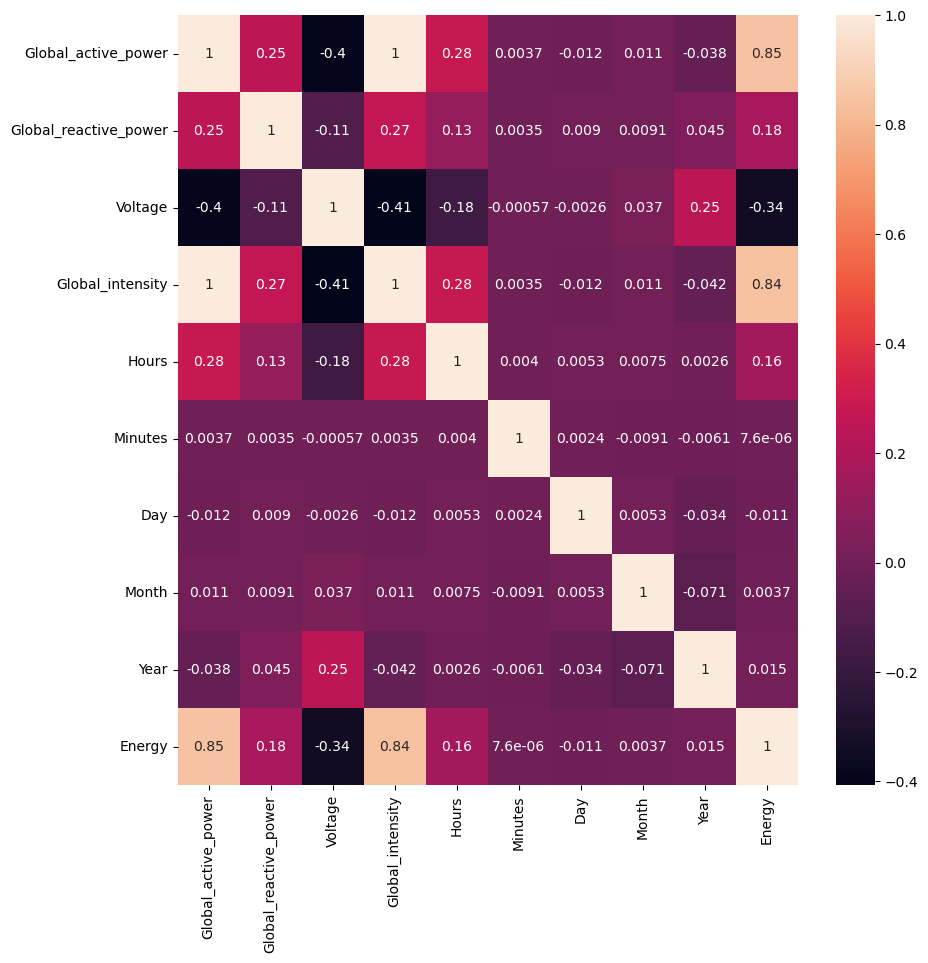

In [56]:
plt.figure(figsize=(10,10))
sns.heatmap(data_sample.corr(),annot=True)

<Axes: >

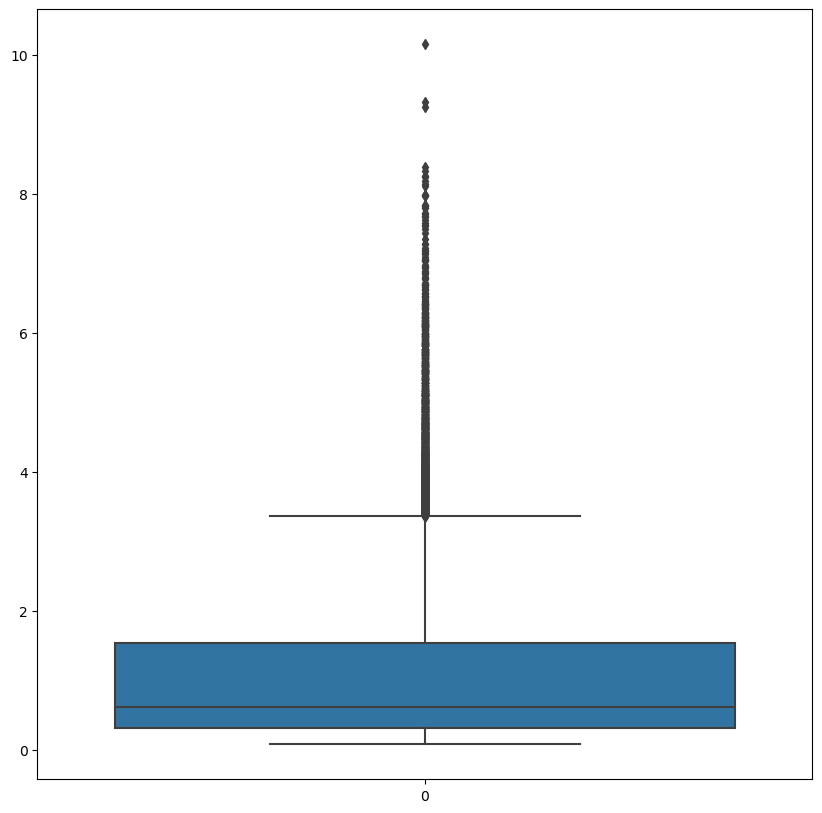

In [65]:
plt.figure(figsize=(10,10))
sns.boxplot(data_sample['Global_active_power'].values)

In [66]:
for i in data_sample['Global_active_power']:
    q1 = data_sample['Global_active_power'].quantile(0.25)
    q3 = data_sample['Global_active_power'].quantile(0.75)
    iqr=q3-q1
    lower_fence = q1-(1.5)*iqr
    upper_fence = q3+(1.5)*iqr
    if i<lower_fence or i>upper_fence:
        data_sample['Global_active_power'] = data_sample['Global_active_power'].replace(i,np.median(data_sample['Global_active_power']))

<Axes: >

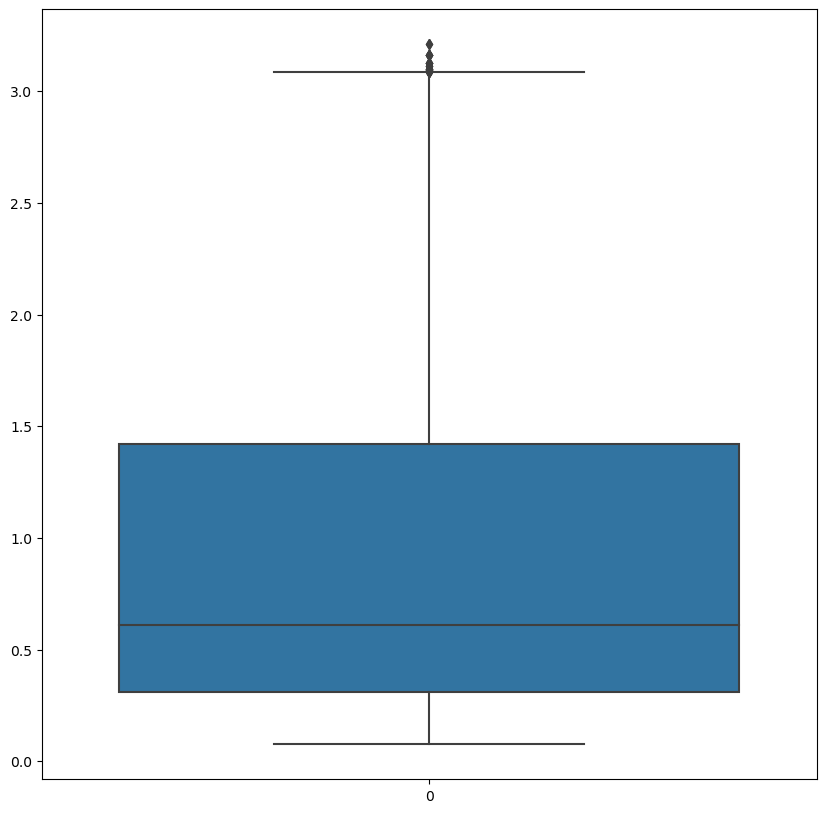

In [67]:
plt.figure(figsize=(10,10))
sns.boxplot(data_sample['Global_active_power'].values)

In [68]:
for i in data_sample['Global_reactive_power']:
    q1 = data_sample['Global_reactive_power'].quantile(0.25)
    q3 = data_sample['Global_reactive_power'].quantile(0.75)
    iqr=q3-q1
    lower_fence = q1-(1.5)*iqr
    upper_fence = q3+(1.5)*iqr
    if i<lower_fence or i>upper_fence:
        data_sample['Global_reactive_power'] = data_sample['Global_reactive_power'].replace(i,np.median(data_sample['Global_reactive_power']))

<Axes: >

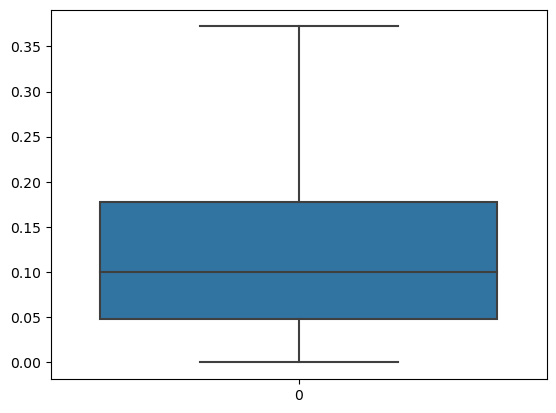

In [69]:
sns.boxplot(data_sample['Global_reactive_power'].values)

<Axes: >

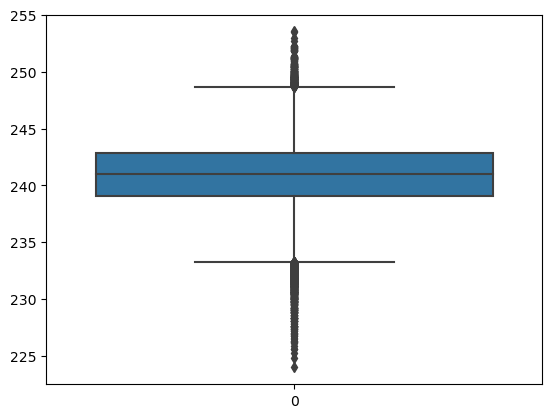

In [70]:
sns.boxplot(data_sample['Voltage'].values)

In [71]:
for i in data_sample['Voltage']:
    q1 = data_sample['Voltage'].quantile(0.25)
    q3 = data_sample['Voltage'].quantile(0.75)
    iqr=q3-q1
    lower_fence = q1-(1.5)*iqr
    upper_fence = q3+(1.5)*iqr
    if i<lower_fence or i>upper_fence:
        data_sample['Voltage'] = data_sample['Voltage'].replace(i,np.median(data_sample['Voltage']))

<Axes: >

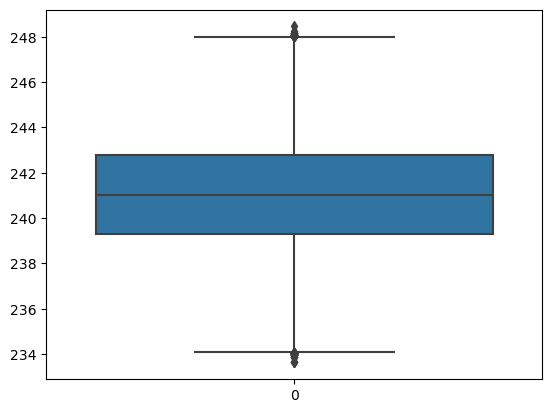

In [72]:
sns.boxplot(data_sample['Voltage'].values)

<Axes: >

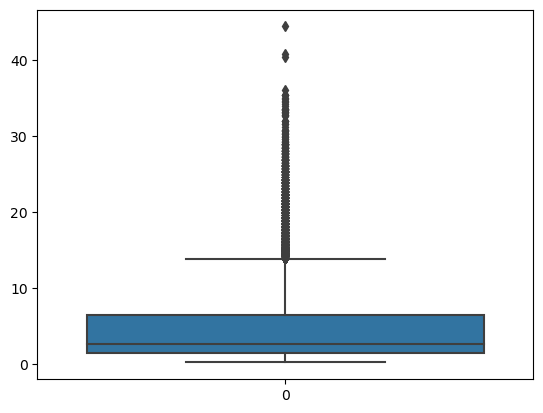

In [73]:
sns.boxplot(data_sample['Global_intensity'].values)

In [74]:
# Global_intensity

for i in data_sample['Global_intensity']:
    q1 = data_sample['Global_intensity'].quantile(0.25)
    q3 = data_sample['Global_intensity'].quantile(0.75)
    iqr=q3-q1
    lower_fence = q1-(1.5)*iqr
    upper_fence = q3+(1.5)*iqr
    if i<lower_fence or i>upper_fence:
        data_sample['Global_intensity'] = data_sample['Global_intensity'].replace(i,np.median(data_sample['Global_intensity']))

<Axes: >

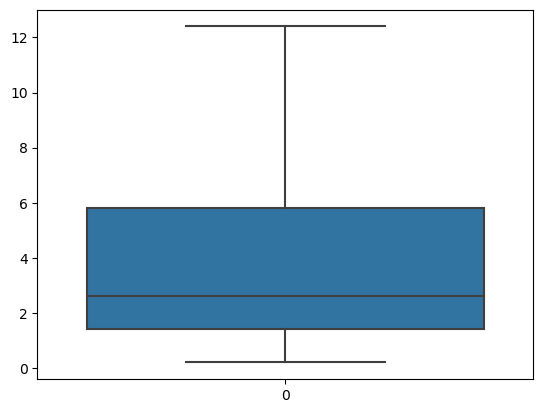

In [75]:
sns.boxplot(data_sample['Global_intensity'].values)

In [77]:
data_sample.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Hours,Minutes,Day,Month,Year,Energy
215916,0.280,0.000,236.93,1.2,16,0,15,5,2007,0.0
502432,2.816,0.144,245.86,11.6,15,16,30,11,2007,42.0
154176,1.452,0.078,239.57,6.0,19,0,4,2,2007,18.0
362761,1.388,0.240,238.12,5.8,15,25,25,8,2007,19.0
1280344,1.450,0.118,237.69,6.0,20,28,23,5,2009,19.0


In [78]:
X = data_sample.iloc[:,:-1]
y = data_sample.iloc[:,-1]

In [79]:
X

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Hours,Minutes,Day,Month,Year
215916,0.280,0.000,236.93,1.2,16,0,15,5,2007
502432,2.816,0.144,245.86,11.6,15,16,30,11,2007
154176,1.452,0.078,239.57,6.0,19,0,4,2,2007
362761,1.388,0.240,238.12,5.8,15,25,25,8,2007
1280344,1.450,0.118,237.69,6.0,20,28,23,5,2009
...,...,...,...,...,...,...,...,...,...
383717,0.178,0.056,240.87,0.8,4,41,9,9,2007
567640,0.610,0.246,234.80,2.6,22,4,14,1,2008
113113,1.798,0.082,241.25,7.4,6,37,3,5,2007
773538,0.634,0.194,238.30,2.8,21,42,6,5,2008


In [80]:
y

215916      0.0
502432     42.0
154176     18.0
362761     19.0
1280344    19.0
           ... 
383717      0.0
567640     43.0
113113     17.0
773538      3.0
1904609    11.0
Name: Energy, Length: 49312, dtype: float64

In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [86]:
X_train

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Hours,Minutes,Day,Month,Year
732223,1.056,0.086,240.13,4.4,5,7,5,8,2008
1394371,0.990,0.100,240.08,4.4,0,55,8,11,2009
1015407,1.690,0.266,237.57,7.2,20,51,20,11,2008
1952075,2.052,0.198,237.72,8.6,7,59,9,2,2010
2067886,1.244,0.082,235.72,5.2,18,10,21,11,2010
...,...,...,...,...,...,...,...,...,...
1817432,1.722,0.258,241.20,8.2,19,56,31,5,2010
427829,1.480,0.270,236.25,6.4,19,53,10,9,2007
852182,0.616,0.346,239.03,3.0,12,26,30,7,2008
2049348,2.604,0.136,238.41,10.8,21,12,11,8,2010


In [87]:
X_test

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Hours,Minutes,Day,Month,Year
504445,1.506,0.296,243.76,6.2,0,49,12,2,2007
418968,0.208,0.050,240.77,0.8,16,12,10,3,2007
261977,0.610,0.100,237.75,2.6,15,41,16,6,2007
1919933,0.418,0.340,240.55,2.2,0,17,8,11,2010
1365936,0.918,0.232,240.40,3.8,7,0,22,7,2009
...,...,...,...,...,...,...,...,...,...
1685541,0.424,0.228,242.60,2.0,5,45,3,1,2010
253306,0.686,0.096,242.51,2.8,15,10,6,10,2007
1226116,1.382,0.000,239.51,5.8,4,40,16,4,2009
252019,0.504,0.116,241.99,2.2,17,43,6,9,2007


In [88]:
X_train = scaler.fit_transform(X_train)
X_train

array([[ 0.21503823, -0.28272257, -0.32389874, ..., -1.20979134,
         0.43551452, -0.37903615],
       [ 0.12490514, -0.13174959, -0.34226168, ..., -0.87089727,
         1.30857832,  0.51101184],
       [ 1.08086219,  1.65835861, -1.26408132, ...,  0.484679  ,
         1.30857832, -0.37903615],
       ...,
       [-0.38584905,  2.52106136, -0.72788344, ...,  1.6143259 ,
         0.14449326, -0.37903615],
       [ 2.32906896,  0.25646665, -0.95558391, ..., -0.5320032 ,
         0.43551452,  1.40105983],
       [ 0.69847937,  0.04079096, -0.23208403, ..., -1.6616501 ,
         0.72653579, -1.26908413]])

In [89]:
X_test = scaler.transform(X_test)
X_test

array([[ 0.82958205,  1.98187214,  1.00925079, ..., -0.41903851,
        -1.31061306, -1.26908413],
       [-0.94303545, -0.6709388 , -0.08885309, ..., -0.64496789,
        -1.0195918 , -1.26908413],
       [-0.39404297, -0.13174959, -1.19797473, ...,  0.03282024,
        -0.146528  , -1.26908413],
       ...,
       [ 0.66024109, -1.21012802, -0.55159921, ...,  0.03282024,
        -0.72857053,  0.51101184],
       [-0.53880218,  0.04079096,  0.35920267, ..., -1.09682665,
         0.72653579, -1.26908413],
       [ 0.74764287,  1.65835861, -0.06681756, ...,  0.59764369,
        -0.146528  , -0.37903615]])

In [90]:
# model training
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg

LinearRegression()

In [92]:
lin_reg.fit(X_train,y_train)

LinearRegression()

In [93]:
lin_reg_pred = lin_reg.predict(X_test)
lin_reg_pred

array([10.84993851,  3.01175352,  9.02021684, ..., 13.26315485,
        4.61131231, 14.01901894])

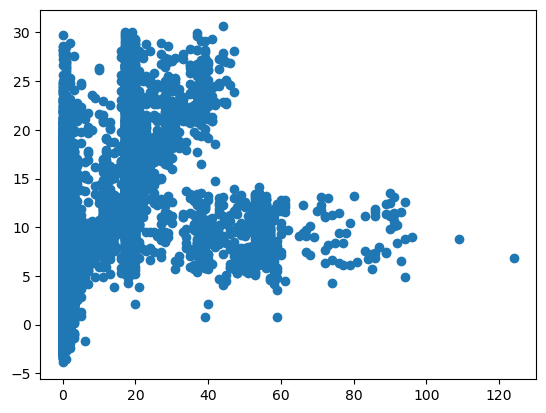

In [98]:
plt.scatter(y_test,lin_reg_pred)

In [96]:
from sklearn.metrics import r2_score,
score = r2_score(y_test,lin_reg_pred)
print(score)

0.26996772004035363


In [99]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[-1]-1)

0.2695637176718092

In [101]:
residuals = y_test-lin_reg_pred

In [102]:
residuals

504445    -10.849939
418968     -3.011754
261977     29.979783
1919933    -5.466961
1365936     1.636916
             ...    
1685541    -3.991372
253306     -3.379618
1226116     4.736845
252019     -4.611312
796555      4.980981
Name: Energy, Length: 16273, dtype: float64

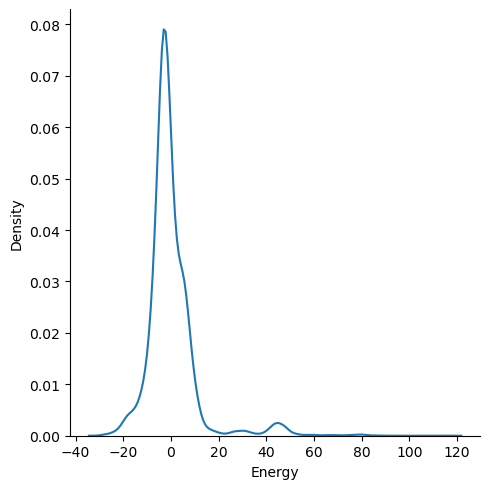

In [103]:
sns.displot(residuals,kind='kde')

In [ ]:
plt.scatter(reg_pred,residuals)